Bappa Moraya...!
# Diabetes Prediction with Machine Learning
### Multivariable Linear Regression Approach
##### [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Constants

### CSV dataset variables
##### Features
`Pregnancies`: Number of times pregnant <br>
`Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br>
`BloodPressure`: Diastolic blood pressure (mm Hg) <br>
`SkinThickness`: Triceps skin fold thickness (mm) <br>
`Insulin`: 2-Hour serum insulin (mu U/ml) <br>
`BMI`: Body mass index (weight in kg/(height in m)^2) <br>
`DiabetesPedigreeFunction`: Diabetes pedigree function <br>
Age: Age (years)

##### Target
`Outcome`: Class variable (0 or 1)

##### Load and Clean Data

In [3]:
dataset = pd.read_csv('../Input/diabetes_original.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check for null or missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


`Conclusion`: Data has no missing or Null values and ready to be separated into Feature set and Target

In [5]:
# Separate Features and Target variables
features = dataset.drop('Outcome', axis=1)
target = dataset['Outcome']

print(features.head(), end='\n\n')
print(target.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


It seems like DPF and Glucose levels might be correlated <br><br>

`Diabetes Prediction Function (DPF)`: Diabetes Pedigree Function (DPF) is a function that estimates the likelihood of diabetes based on a person's family history and age. The DPF is a positively skewed variable with no zero values. People with diabetes seem to have a higher DPF than people without diabetes.

[]

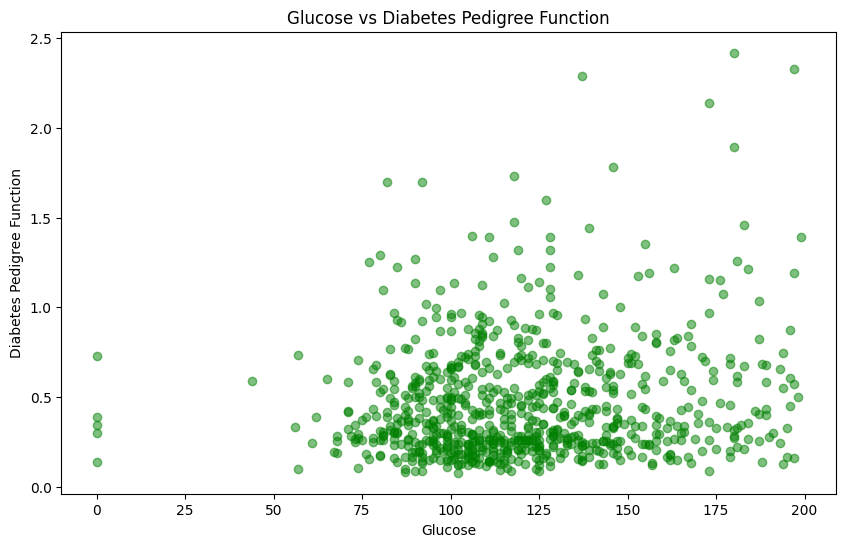

In [6]:
plt.figure(figsize=[10, 6])

plt.title('Glucose vs Diabetes Pedigree Function')
plt.xlabel('Glucose')
plt.ylabel('Diabetes Pedigree Function')

plt.scatter(features.Glucose, features.DiabetesPedigreeFunction, color='green', alpha=0.5)
plt.plot()

Let's see how diabetes is distributed among various ages

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

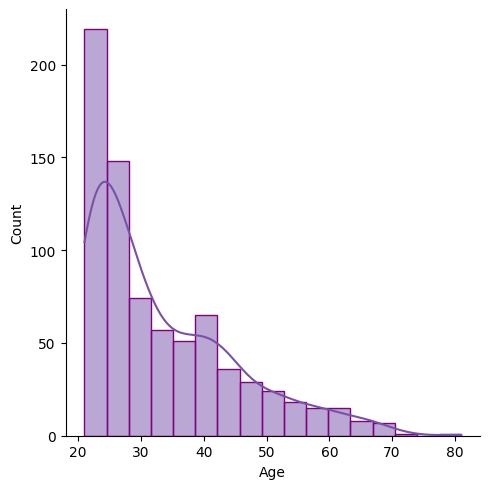

In [7]:
plt.figure(figsize=[10, 6])

sns.displot(features.Age, color='#7851a9', ec='purple', kde=True)
plt.show()

#### Correlation between attributes

In [8]:
features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [9]:
correlations = dataset.corr()
correlations

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
mask = np.zeros_like(correlations)
up_tri_idx = np.triu_indices_from(mask)
mask[up_tri_idx] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

c:\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


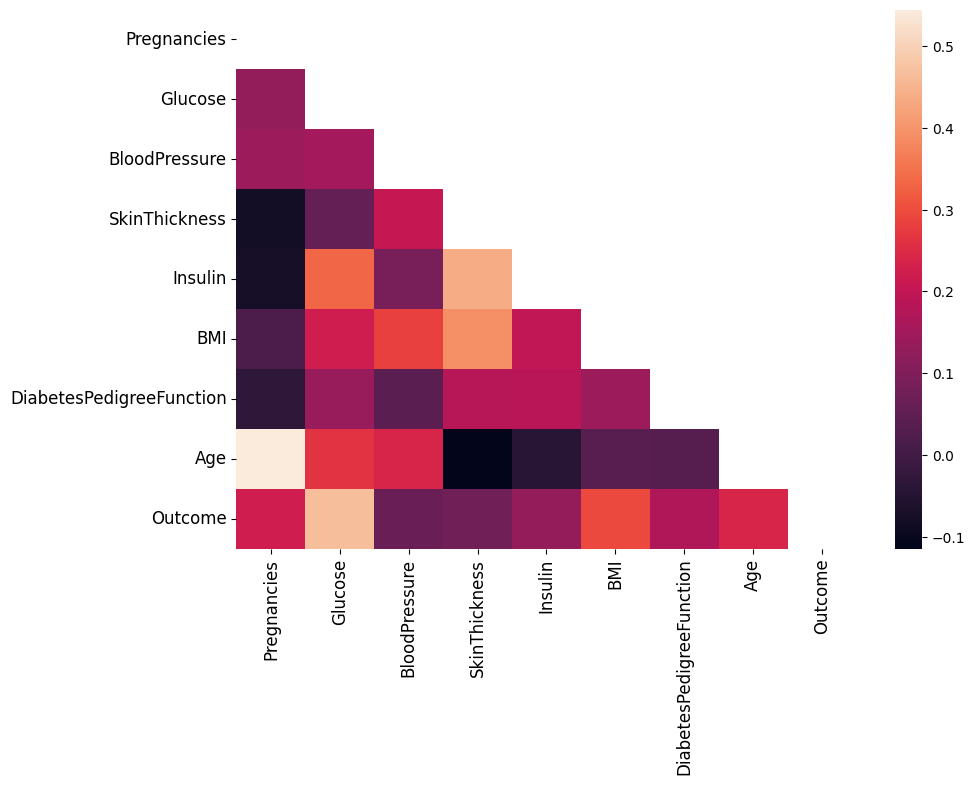

In [11]:
# Plot heatmap: correlation matrix
plt.figure(figsize=[10, 7])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mask duplicates
sns.heatmap(correlations, mask=mask, annot=True, annot_kws={'size': 7})
plt.show()

### Cleaning Data for NaN values masked as unusal 0 values

In [12]:
# Data cleaning and removing invalid 0 values
diabetes_data_copy = dataset.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [13]:
# Dataset with excluding records with NaN values
drop_nan_data = diabetes_data_copy.dropna()
drop_nan_data.head()

# Save new data
drop_nan_data.to_csv("New Data/diabetes_drop_nan.csv")

In [14]:
# Aiming to impute nan values for the columns in accordance with their distribution
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
nan_to_distribution_data = diabetes_data_copy.to_csv("New Data/diabetes_clean_with_distribution.csv")

In [16]:
# Aiming to impute nan values for the columns in accordance with their median only
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].median(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].median(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [17]:
nan_to_median_data = diabetes_data_copy.to_csv("New Data/diabetes_clean_with_median.csv")